# Data Cleaning

In [1]:
import sys, os
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Ingestion

In [9]:
df_train = pd.read_csv("./Data/Abandono_clientes.csv")
print(f"Shape: {df_train.shape}")
df_test = pd.read_csv("./Data/Abandono_teste.csv", sep=";")
print(f"Shape: {df_test.shape}")

Shape: (10000, 14)
Shape: (1000, 13)


# Abandono Clientes

## General Look at the Data

In [10]:
df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
df_train.duplicated().sum()

np.int64(0)

In [12]:
df_train.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [30]:
for col in df_train[["HasCrCard", "IsActiveMember"]]:
    print(df_train[col].value_counts())

HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64


### Observations:
- The dataset is completely clean, with no missing data and correct dtypes for all columns
- `HasCrCard` and `IsActiveMember` are categorical columns, only having 0 or 1 as values
- No cleaning pipeline is required

# Outliers

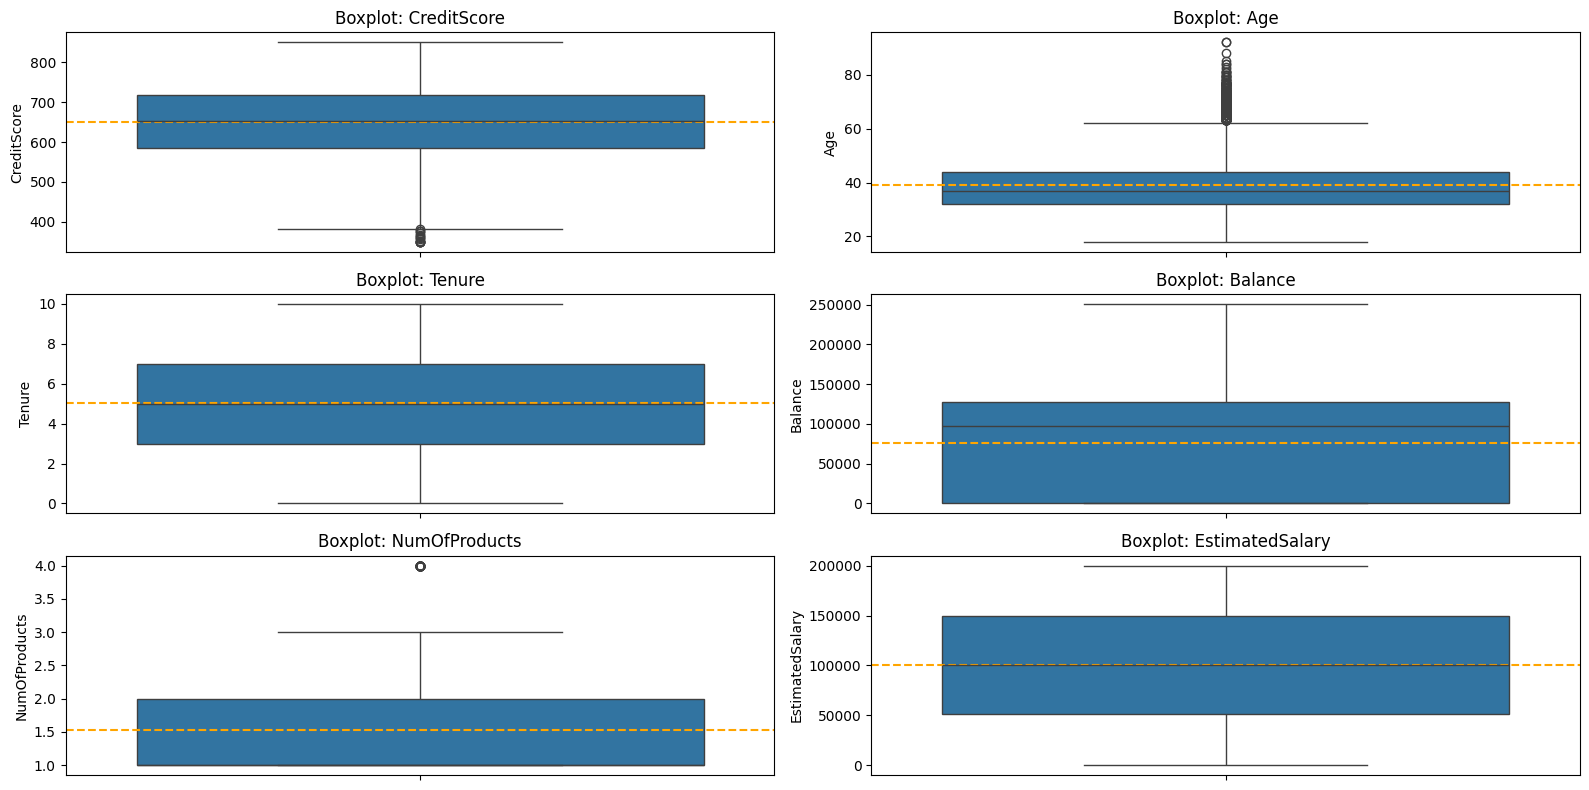

In [32]:
fig, ax = plt.subplots(3, 2, figsize=(16, 8))
ax = ax.ravel()
columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
for i, col in enumerate(df_train[columns]):
    sns.boxplot(y=df_train[col], ax=ax[i])
    ax[i].axhline(df_train[col].mean(), color="orange", linestyle="--")
    ax[i].set_title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

### Observations:
- The orange line represents the mean of each column
- Only `CreditScore` and `Age` showed outliers
- All other columns appear to have a distribution that is close to, or in fact a normal one
- Some data appears to have been synthetic generated, since it's almost impossible to have such a good distribution of salaries

### Impact:
- The outliers are not extreme and are inside the realm of possible values (there's no age of 200 for example)
- Since the dataset appears to be synthetic generated, I will assume that all data is correct and all outliers will be used

# Abandono Teste

## General Look at the Data

In [33]:
df_test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,10001,15798485,Copley,565,France,Male,31,1,0.00,1,0,1,20443.08
1,10002,15588959,T'ang,569,France,Male,34,4,0.00,1,0,1,4045.90
2,10003,15624896,Ku,669,France,Female,20,7,0.00,2,1,0,128838.67
3,10004,15639629,McConnan,694,France,Male,39,4,173255.48,1,1,1,81293.10
4,10005,15638852,Ts'ui,504,Spain,Male,28,10,109291.36,1,1,1,187593.15


In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        1000 non-null   int64  
 1   CustomerId       1000 non-null   int64  
 2   Surname          1000 non-null   object 
 3   CreditScore      1000 non-null   int64  
 4   Geography        1000 non-null   object 
 5   Gender           1000 non-null   object 
 6   Age              1000 non-null   int64  
 7   Tenure           1000 non-null   int64  
 8   Balance          1000 non-null   float64
 9   NumOfProducts    1000 non-null   int64  
 10  HasCrCard        1000 non-null   int64  
 11  IsActiveMember   1000 non-null   int64  
 12  EstimatedSalary  1000 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 101.7+ KB


In [36]:
df_test.duplicated().sum()

np.int64(0)

In [35]:
df_test.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

### Observations:
- Same thing as the training data, no cleaning pipeline required